# Part I - Dataset Exploration of Prosper Loan Data
## by Snehal Gaikwad




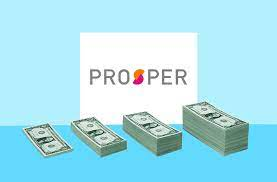

## Introduction
> This is Data Exploration Project of Prosper Loan Data. Prosper Marketplace is US based peer-to-peer lending industry. Prosper 
has facilitated more than $23 billion in loans to more than 1,390,000 people. This data set contains data of 113,937 loans with 81 different parameters such as loan amount, borrower rate, loan  status, borrower income, borrower employment status, borrower credit  history, and the latest payment information.The main aim of this exploration project is to find the relationship between various parameters and present it with good visualization which will make it easily understandable.  

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Read the prosper loan dataset form prosperLaonData.csv file
df=pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
df.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,C,5.0,1,IL,Food Service Management,Employed,246.0,True,False,NaN,2013-04-14 05:54:58,700.0,719.0,1997-09-01 00:00:00,9.0,9.0,41.0,9,209.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,7714.0,0.80,1886.0,37.0,0.83,3.0,0.13,"$50,000-74,999",True,4333.333333,9BD7367919051593140DB62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,11,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,3647.4000,2238.38,1409.0200,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,A,8.0,7,PA,Professional,Employed,21.0,True,False,NaN,2011-11-03 20:42:53,700.0,719.0,1992-01-17 00:00:00,14.0,13.0,39.0,9,495.0,1.0,4.0,1.0,5062.0,4.0,0.0,0.0,15743.0,0.69,6658.0,39.0,0.92,0.0,0.11,"$75,000-99,999",True,8041.666667,62D93634569816897D5A276,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,0,NaN,28,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,2330.5500,1997.16,333.3900,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,D,3.0,1,TX,Other,Employed,84.0,True,False,NaN,2013-12-13 05:49:15,700.0,719.0,2002-02-25 00:00:00,12.0,12.0,25.0,9,521.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22147.0,0.73,7853.0,25.0,1.00,0.0,0.51,"$25,000-49,999",True,2875.000000,DD1A370200396006300ACA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,546.7000,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,C,5.0,2,GA,Food Service,Full-time,94.0,True,False,NaN,2011-11-14 13:18:24,680.0,699.0,1993-12-01 00:00:00,11.0,11.0,22.0,7,488.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,11956.0,0.69,4137.0,19.0,0.80,1.0,0.48,"$25,000-49,999",True,3875.000000,589536350469116027ED11B,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,NaN,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,21122.5600,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.shape

(113937, 81)

In [7]:
#Check the minimum, maximum and mean value of all the columns of data.
df.describe().loc[['min','max','mean']]

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.00000,0.000000,1.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,755.000000,880.000000,899.000000,59.000000,54.000000,136.000000,51.00000,14985.000000,105.000000,379.000000,83.000000,463881.000000,99.000000,38.000000,20.000000,1.435667e+06,5.950000,646285.000000,126.000000,1.000000,20.000000,10.010000,1.750003e+06,8.0000,141.000000,141.000000,42.000000,21.00000,72499.000000,23450.950000,286.000000,2704.000000,44.000000,100.000000,136486.000000,35000.00000,2251.510000,40702.390000,35000.000000,15617.030000,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.00000,25000.000000,1189.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.4211,22.934345,22.271949,0.613629,0.04854,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.02346,16.550751,80.475228


### What is the structure of your dataset?
The structure of Prosper Loan Data set contains 113937 rows which indicates data from 113937 loans lended by company and 81 columns indicates the various parameters related to loan information. The data type of the columns are int, float, object and bool. 

### What is/are the main feature(s) of interest in your dataset?
The main features in I am interested are the one which will help me to figure out the eligibility of a person for loan and  loan interest rate. Also the loan period which help to decide the loan payment amount. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Following are the some of the features which will help me to find the eligibility of a person for loan: 
> 1. LoanStatus: Th current status of loan. 
> 2. BorrowerAPR:The Borrower's Annual Percentage Rate (APR) for the loan.
> 3. ProsperRating (numeric):The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 -     E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
> 4. ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10         being the best, or lowest risk score.  Applicable for loans originated after July 2009.
> 5. EmploymentStatus:The employment status of the borrower at the time they posted the listing.
> 6. Occupation:The Occupation selected by the Borrower at the time they created the listing.
> 7. IncomeRange: The income range of the borrower at the time the listing was created.
> 8. StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
> 9. LoanOriginalAmount: The origination amount of the loan.

In [8]:
# Drop the columns having majority cells are having null value
df=df.drop(labels=['CreditGrade','GroupKey','TotalProsperLoans','TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber'],axis=1)

In [9]:
# check columns for null value
df.isnull().sum()

ListingKey                                0
ListingNumber                             0
ListingCreationDate                       0
Term                                      0
LoanStatus                                0
ClosedDate                            58848
BorrowerAPR                              25
BorrowerRate                              0
LenderYield                               0
EstimatedEffectiveYield               29084
EstimatedLoss                         29084
EstimatedReturn                       29084
ProsperRating (numeric)               29084
ProsperRating (Alpha)                 29084
ProsperScore                          29084
ListingCategory (numeric)                 0
BorrowerState                          5515
Occupation                             3588
EmploymentStatus                       2255
EmploymentStatusDuration               7625
IsBorrowerHomeowner                       0
CurrentlyInGroup                          0
DateCreditPulled                

<AxesSubplot:>

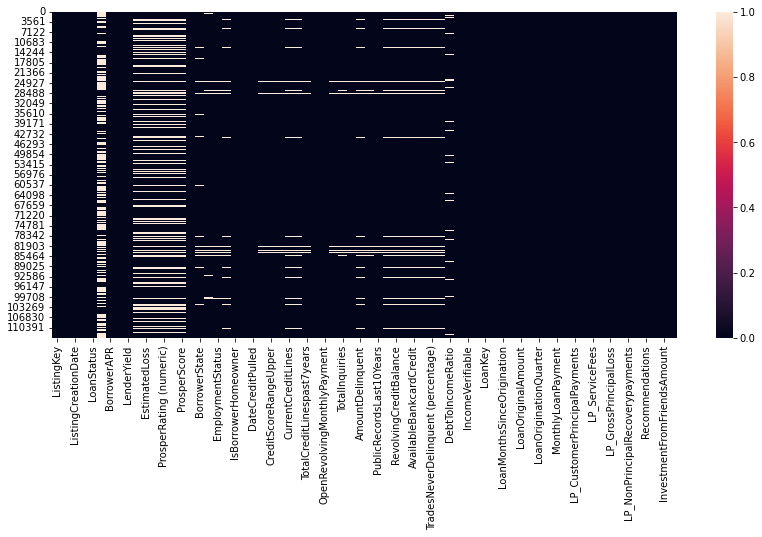

In [10]:
plt.figure(figsize=(14,6))
sb.heatmap(data=df.isnull())

In [11]:
# Delete the rows having null value from the column EstimatedEffectiveYield
df=df[df['EstimatedEffectiveYield'].isnull()!= True]

assert df['EstimatedEffectiveYield'].isnull().sum()==0

In [12]:
# Delete the rows having null values from the column DebtToIncomeRatio
df=df[df['DebtToIncomeRatio'].isnull()!= True]

assert df['DebtToIncomeRatio'].isnull().sum()==0

In [13]:
# Replace the rows having null values in occupation columns 
df['Occupation']=df['Occupation'].replace(to_replace=np.nan, value='Not Available');

assert df['Occupation'].isnull().sum()==0

In [14]:
# Replace the rows having null values in the ClosedDate column
df['ClosedDate']=df['ClosedDate'].replace(to_replace=np.nan, value='Not Applicable')

assert df['ClosedDate'].isnull().sum()==0

In [15]:
#Fill the null values with 0 in EmploymentStatusDuration Column.
df['EmploymentStatusDuration']=df['EmploymentStatusDuration'].fillna(0)

assert df['ClosedDate'].isnull().sum()==0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          77557 non-null  object 
 1   ListingNumber                       77557 non-null  int64  
 2   ListingCreationDate                 77557 non-null  object 
 3   Term                                77557 non-null  int64  
 4   LoanStatus                          77557 non-null  object 
 5   ClosedDate                          77557 non-null  object 
 6   BorrowerAPR                         77557 non-null  float64
 7   BorrowerRate                        77557 non-null  float64
 8   LenderYield                         77557 non-null  float64
 9   EstimatedEffectiveYield             77557 non-null  float64
 10  EstimatedLoss                       77557 non-null  float64
 11  EstimatedReturn                     7755

In [17]:
# Check for statistics of all the columns in the data using describe  
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,7.755700e+04,77557.000000,77557.00000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.00000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000,77557.000000
mean,7.787119e+05,42.724035,0.22373,0.193411,0.183407,0.166606,0.078596,0.095288,4.131761,6.061967,3.284771,104.221940,698.999446,717.999446,10.591010,9.599366,27.946491,7.413876,428.804789,0.978635,4.334090,0.330015,966.540312,3.752595,0.286576,0.008394,17696.703367,0.56907,11146.585195,24.185721,0.904932,0.747992,0.258752,5963.503215,33.401227,15.724422,87206.581482,9269.314208,295.754619,3691.786398,2651.609403,1040.176996,-55.483198,-7.824762,348.954185,341.098625,7.093615,0.998163,0.016311,0.007388,3.810430,69.227330
std,2.357698e+05,11.711915,0.07916,0.073899,0.073900,0.067386,0.045938,0.029892,1.658808,2.362354,4.385368,96.792354,47.160646,47.160646,5.316589,4.926163,13.272594,4.510794,415.849105,1.399935,3.840599,1.132547,7410.038725,9.464378,0.640983,0.103172,30381.727031,0.30068,18227.218381,11.607605,0.121826,1.001620,0.318326,5082.144391,143.863789,13.822735,28786.239990,6398.380615,189.327595,4278.129194,3676.445220,1131.352117,60.524567,73.040807,1676.497107,1656.295782,115.041216,0.020395,0.186182,0.107290,111.864519,97.431847
min,4.162750e+05,12.000000,0.04583,0.040000,0.030000,-0.181600,0.004900,-0.181600,1.000000,1.000000,0.000000,0.000000,600.000000,619.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.080000,0.000000,0.000000,0.250000,0.000000,0.000000,38045.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,-589.950000,-4865.080000,-94.200000,-437.680000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,5.626240e+05,36.000000,0.16175,0.134900,0.124900,0.115000,0.042400,0.074080,3.000000,4.000000,1.000000,31.000000,660.000000,679.000000,7.000000,6.000000,18.000000,4.000000,159.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3904.000000,0.33000,1112.000000,16.000000,0.850000,0.000000,0.150000,3533.333333,0.000000,4.000000,61730.000000,4000.000000,158.490000,796.350000,392.800000,253.850000,-73.660000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,7.508730e+05,36.000000,0.21566,0.184500,0.174500,0.157600,0.069900,0.090600,4.000000,6.000000,1.000000,75.000000,700.000000,719.000000,10.000000,9.000000,26.000000,7.000000,313.000000,1.000000,3

In [18]:
#Convert data type of date columns from object to datetime
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])
df['ListingCreationDate']=pd.to_datetime(df['ListingCreationDate'])

## Univariate Exploration

In [19]:
# Define a function to plot countplot using seaborn
def sbcountplot(df,parm,order_index):
    base_color=sb.color_palette()[0]
    a=sb.countplot(data=df,x=parm,color=base_color,order=order_index)
    a.bar_label(a.containers[0]);
    return 

### Visualization 1

##### Question: What is the current status of lended loans? 

In [20]:
# Count of loans as per status (current, completed, charged off....)
df['LoanStatus'].value_counts()

Current                   52478
Completed                 17703
Chargedoff                 4445
Defaulted                   885
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

##### Visualization

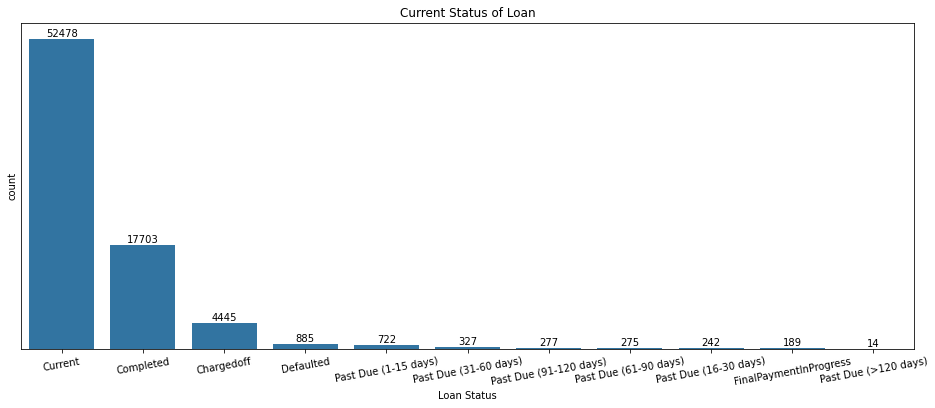

In [21]:
# create a figure to plot countplot of Loan status 
plt.figure(figsize=(16,6))

# count of loan as per status
Loan_count=df.LoanStatus.value_counts()

#Plot count plot of loanStatus 
sbcountplot(df,'LoanStatus',Loan_count.index)

# label and title for the plot
plt.xlabel('Loan Status')
plt.title('Current Status of Loan')
plt.xticks(rotation=10);
plt.yticks([]);

##### Observations:
The status of 52,478 loans is current loan, it means that more than 50% of the loans are ongoing.  17,703 are completed loans and 189 loans are having their final payment in progress.  

### Visualization 3

##### Question: How is Borrower APR distributed in the dataset? 

##### Visualization

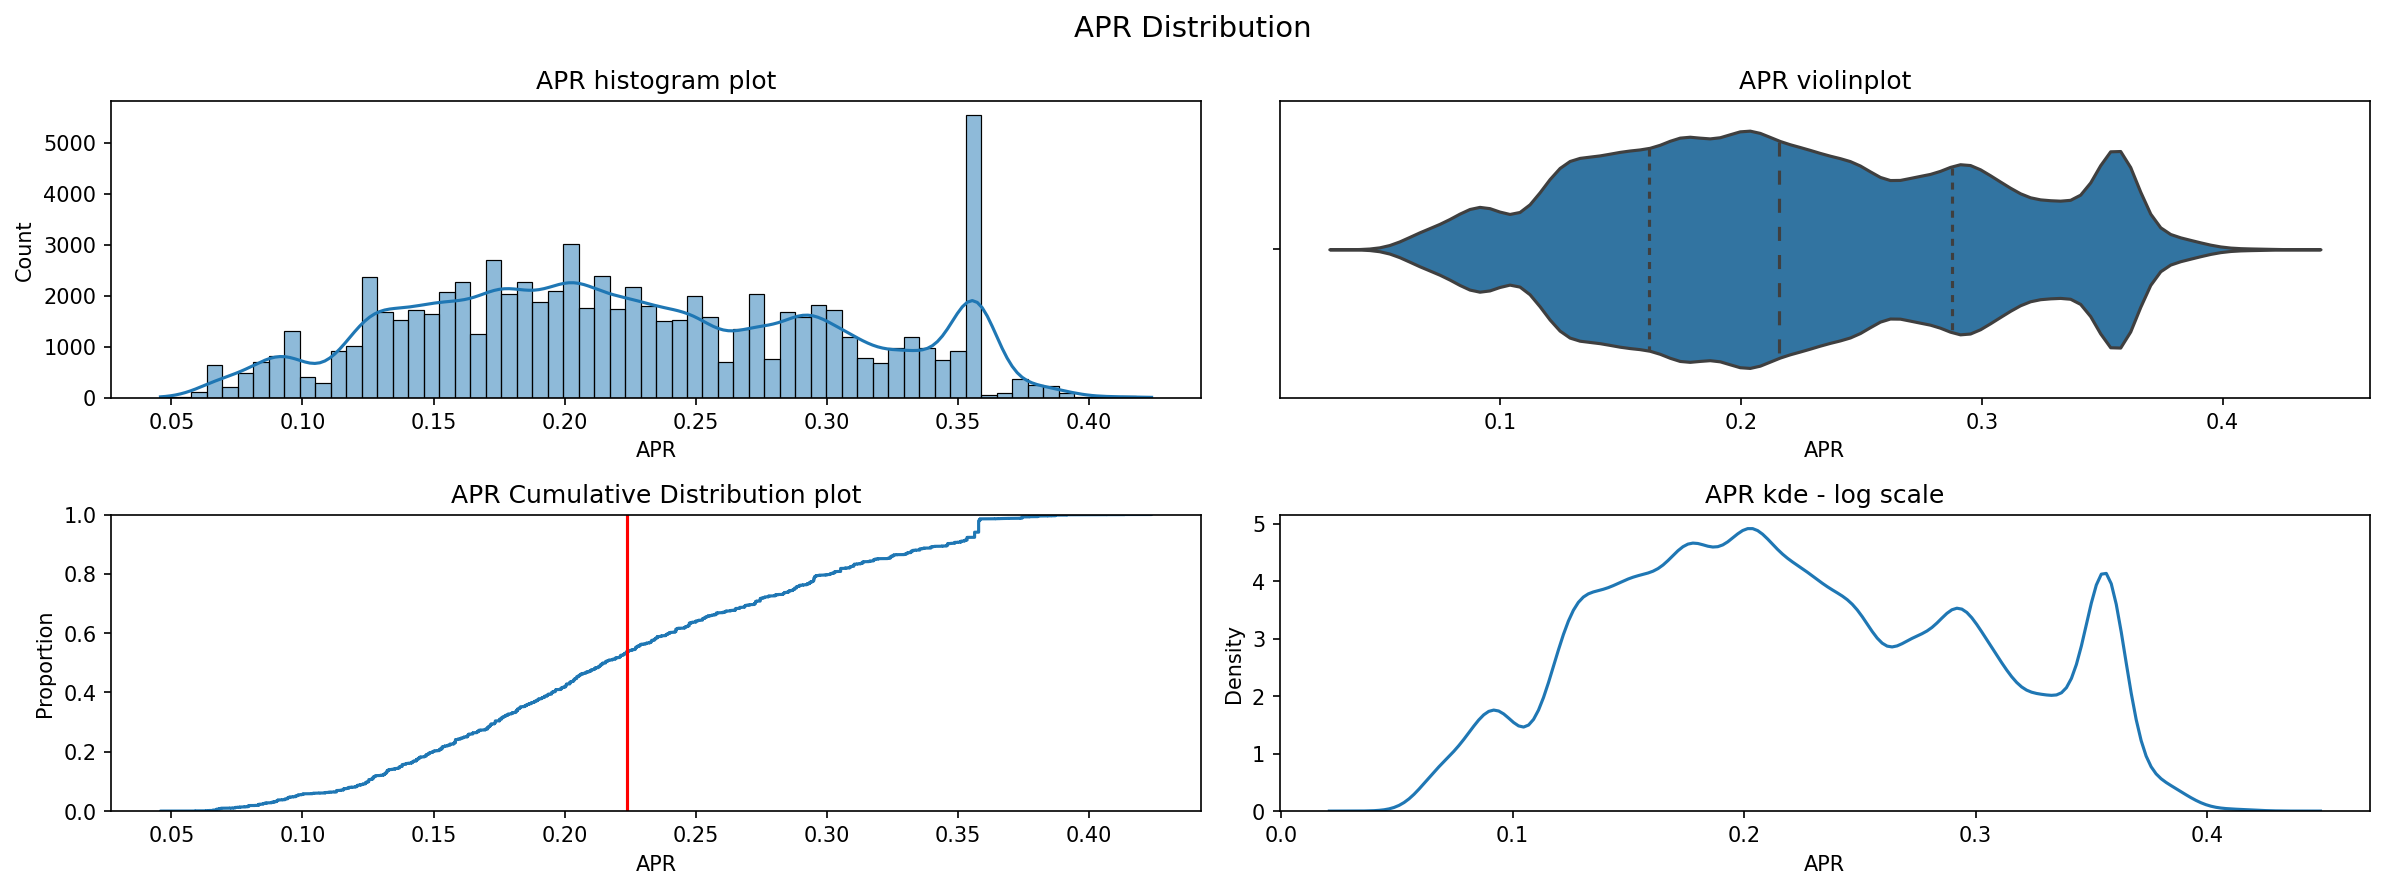

In [22]:
# creating subplots for Borrowers Annual Percentage Rate 
fig, axes = plt.subplots(2,2,figsize=[16, 6], dpi=150);

# Title of Main plot:
fig.suptitle("APR Distribution", fontsize=14);

# subplots:
sb.histplot(data=df, x='BorrowerAPR', ax = axes[0][0], kde=True);
sb.violinplot(data=df, x='BorrowerAPR',inner='quartile', ax=axes[0][1]);
sb.ecdfplot(data=df, x='BorrowerAPR', ax=axes[1][0]);
sb.kdeplot(data=df, x='BorrowerAPR', ax=axes[1][1]);

#Plotting of vertical line for mean value of APR
axes[1][0].axvline(df['BorrowerAPR'].mean(), color='red')


#Titles and labels for subplots
axes[0][0].set_title('APR histogram plot')
axes[0][0].set_xlabel("APR")
axes[0][1].set_title('APR violinplot')
axes[0][1].set_xlabel("APR")
axes[1][0].set_title('APR Cumulative Distribution plot')
axes[1][0].set_xlabel("APR");
axes[1][1].set_title('APR kde - log scale')
axes[1][1].set_xlabel('APR')
plt.tight_layout()

##### Observations:
Four different plots have been plotted to observe the borrower's Annual Percentage Rate distribution namely histogram, violinplot, Cumulative Distribution plot and log scale kde plot.

It shows that APR has multimodal distribution. The mean value of APR is around 0.225 and there is a sharp peak at around 0.36. 

### Visualization 4

##### Question: What is prosper rating and prosper score of the loan borrower?

##### Visualization 

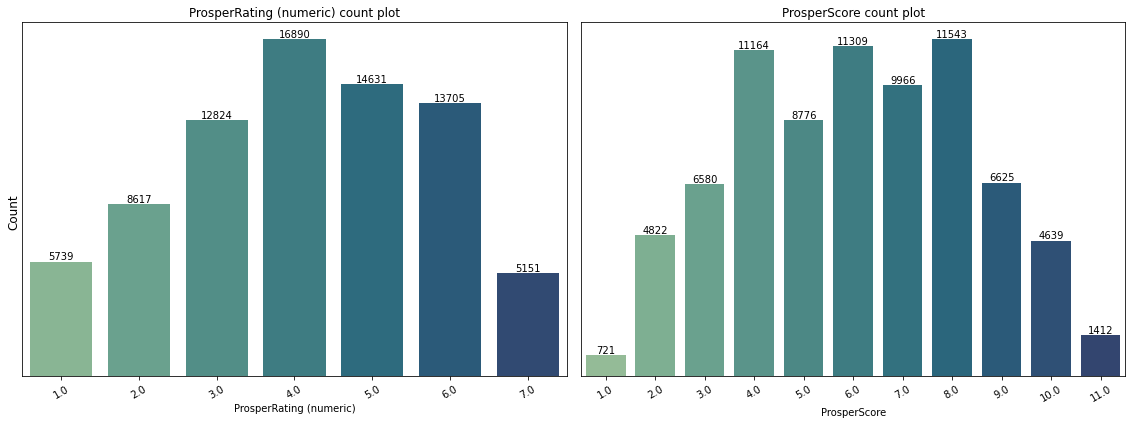

In [23]:
# creating subplots for Prosper Rating and Prosper Score
fig, axes=plt.subplots(1,2, figsize=[16,6])

# Label y axis
fig.supylabel("Count")

# Create a for loop to plot respective subplot
for idx, col in enumerate(['ProsperRating (numeric)','ProsperScore']):
    sb.countplot(data=df,x=col,ax=axes[idx],palette='crest')
    axes[idx].bar_label(axes[idx].containers[0])
    
    # Remove y axis and y ticks:
    axes[idx].set_yticks([])
    axes[idx].set(yticklabels=[])

    # change the x and y labels:
    axes[idx].set_xlabel(f"{col}")
    axes[idx].set_ylabel("")
    axes[idx].set_title(f"{col} count plot")
    axes[idx].tick_params(axis="x", labelrotation=30)

# Adjust subplot parameters
plt.tight_layout()

##### Observations:
The distribution of prosper ratings is unimodal, with the most common rating belongs to 4 also represented as C. Listings with very high prosper rating i.e 7 which is also represented as AA is the least common.16890 borrowers are having 4 prosper rating out of 7 whereas 5151 borrowers are having maximum prosper rating of 7.

In prosper score distribution, the common prosper score is 4, 6 and 8. The maximum 11543 borrowers prosper score is 8 and 4639 borrowers are having propser score of 10 means they have lower risk score.  

### Visualization 5

##### Question: For what purpose most of the loans were taken? 

##### Visualization

In [24]:
# Make a dictionary of all listing categories
List_category = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map the dictionary contents to the ListingCategory (numeric) column
df['ListingCategory']= df['ListingCategory (numeric)'].map(List_category)

# display the result
df['ListingCategory'].unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expenses', 'Auto', 'Medical or Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Baby & Adoption', 'Engagement Ring',
       'Business', 'Large Purchases', 'Boat', 'RV', 'Not Available',
       'Cosmetic Procedure', 'Student Use', 'Green Loans'], dtype=object)

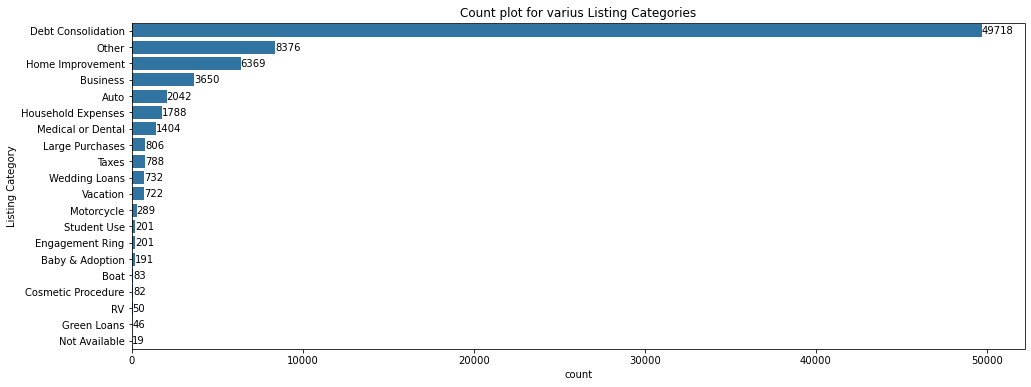

In [25]:
#Create a figure to plot count plot of Listing category
plt.figure(figsize=(16,6))

# Count of loan borrowers as per listing categoty
listing_category_count=df['ListingCategory'].value_counts()

# plot a count plot 
g=sb.countplot(data=df, y='ListingCategory',color=sb.color_palette()[0],order=listing_category_count.index)

#Label the bar with count value
g.bar_label(g.containers[0]);

# Lable and title for a plot
plt.ylabel('Listing Category')
plt.title('Count plot for varius Listing Categories');

##### Observations: 
The maximum number of loans i.e.49,718 loans were taken for Debt Consolidation that is for the payment of other loans. Also 6369 loans were taken for house improvement and then for business i.e 3650. Least number of loans were taken for green loan, RV and cosmetic procedures.  

### Visualization 6

##### Question: What amount of loan was taken by maximum borrowers? 

##### Visualization

In [26]:
# describe Loan amount to find min and max value
df['LoanOriginalAmount'].describe()

count    77557.000000
mean      9269.314208
std       6398.380615
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

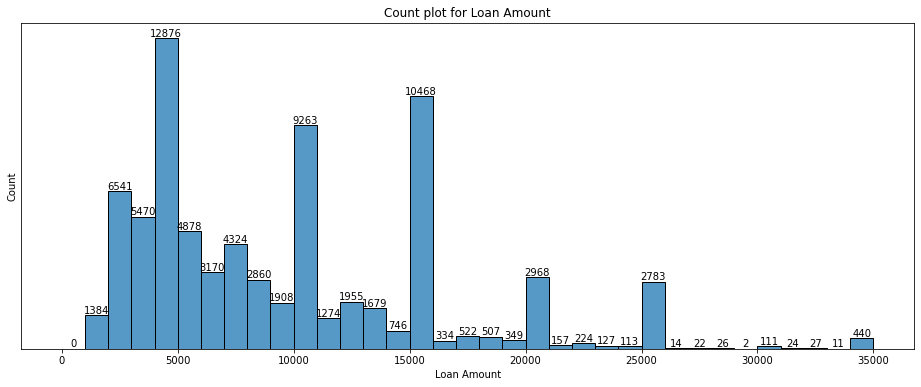

In [27]:
#Create a figure to plot histogram of Loan Original Amount
plt.figure(figsize=(16,6))

# Define number of bins for histogram depending upon min and max value
bins_x=np.arange(0,df['LoanOriginalAmount'].max()+1000,1000)

# Plot hostogram
p=sb.histplot(data=df, x='LoanOriginalAmount',bins=bins_x, palette='Crest')

# Label the bars of histogram with the count value
p.bar_label(p.containers[0]);

# Label and title for a plot
plt.xlabel('Loan Amount')
plt.title('Count plot for Loan Amount')
plt.yticks([]);

##### Observations:
In this distribution we can observed spikes at 5000, 10000, 15000, 20000 and 25000. It indicates that most of the borrowers are taking loan in the multiple of 5000. Maximum number of borrowers i.e. 12876 have taken loan in the range 4900 -5000. 10468 borrowers have taken loan in the range 1,5000-16,000. Very less number of borrowers have taken loan more than 25,000. 

### Visualization 7

##### Question: What is distribution of loan amount per year

,LoanOriginationDate,count
0,2009,8184357
1,2010,24275750
2,2011,67321121
3,2012,139148882
4,2013,345012423
5,2014,134957669


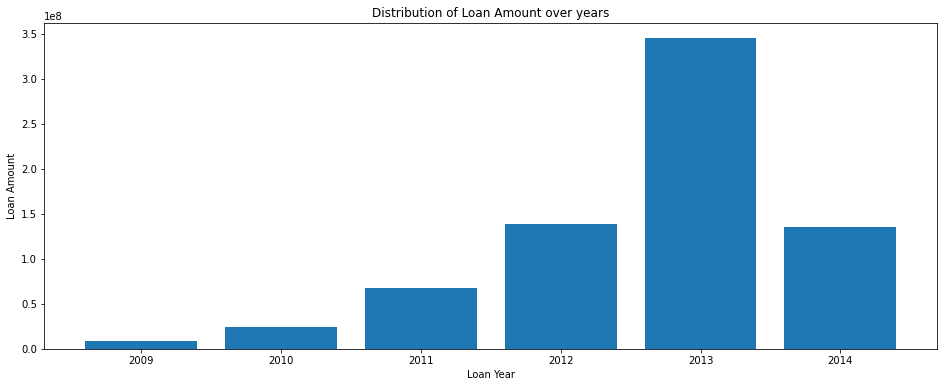

In [28]:
# Creat a figure to plot bar plot for Loan amount as per year
plt.figure(figsize=(16,6))

#Calculate the Laon amount per year
Loan_Per_Year=df.groupby([df['LoanOriginationDate'].dt.year])['LoanOriginalAmount'].sum()

# Create a table 
Loan_Per_Year=Loan_Per_Year.reset_index(name='count')

# Plot a barplot with year and count
plt.bar(x=Loan_Per_Year['LoanOriginationDate'],height=Loan_Per_Year['count'])

# Label and title for a plot
plt.xlabel('Loan Year')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount over years')
Loan_Per_Year

##### Observations:
Maximum loan amount of 345012423 were given in the year 2013 and after that in year 2012 and 2014.

The plot also shows that there is continous increase in the loan amount from year 2009 till year 2013 and then there is sudden fall in year 2014. It is because the data of year 2014 is available only form quater 1. 

### Visualization 8

##### Question: What is quarterly distribution of loan amount by prosper? 

##### Visualization

In [29]:
# Make a group of loan amount according to the quarters of year
Quarter_loan_amount=df.groupby(['LoanOriginationQuarter'])['LoanOriginalAmount'].sum()

# Create table of calculated values
Quarter_loan_amount=Quarter_loan_amount.reset_index(name='Total_amount')
Quarter_loan_amount

,LoanOriginationQuarter,Total_amount
0,Q1 2010,5443909
1,Q1 2011,10512919
2,Q1 2012,29563772
3,Q1 2013,32024608
4,Q1 2014,134957669
5,Q2 2010,5644109
6,Q2 2011,14599565
7,Q2 2012,33922588
8,Q2 2013,69889138
9,Q3 2009,2043677


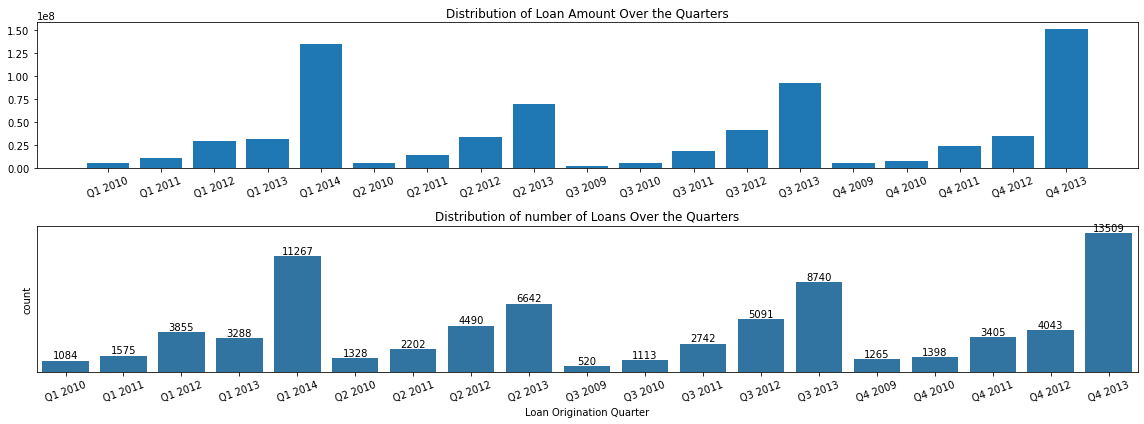

In [30]:
# Create a figure to plot subplots
fig, axes=plt.subplots(2,1,figsize=[16,6])

# Use first subplot for plotting 
plt.subplot(2,1,1)

# Plot a bar plot for Loan amount with respect to quarter 
a=plt.bar(x=Quarter_loan_amount['LoanOriginationQuarter'],height=Quarter_loan_amount['Total_amount'])

# Label and title for a plot
plt.xticks(rotation=20);
plt.title('Distribution of Loan Amount Over the Quarters')

# Use second subplot for plotting 
plt.subplot(2,1,2)

#Calculate count of loans per quarter
Quarter_order=df['LoanOriginationQuarter'].value_counts().sort_index()

# Plot a count plot for Loans per quarter 
sbcountplot(df,'LoanOriginationQuarter',Quarter_order.index)

#Label and title for a plot
plt.xticks(rotation=20);
plt.yticks([]);
plt.xlabel('Loan Origination Quarter')
plt.title('Distribution of number of Loans Over the Quarters')

#Adjust the subplots
plt.tight_layout()

##### Observations :
The first subplot shows the loan amount of the year per quarter (Q1, Q2, Q3, Q4). The amount in respective quarter in the respective year is increasing and the mostly the loan amount is more in fourth quarter of each year. 

### Visualization 9

##### Question: What is emplyment status of the borrower? 

##### Visualization 

In [31]:
# Calculate count of borrowers according to the Employment status
df['EmploymentStatus'].value_counts()

Employed         65884
Full-time         7585
Other             3526
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

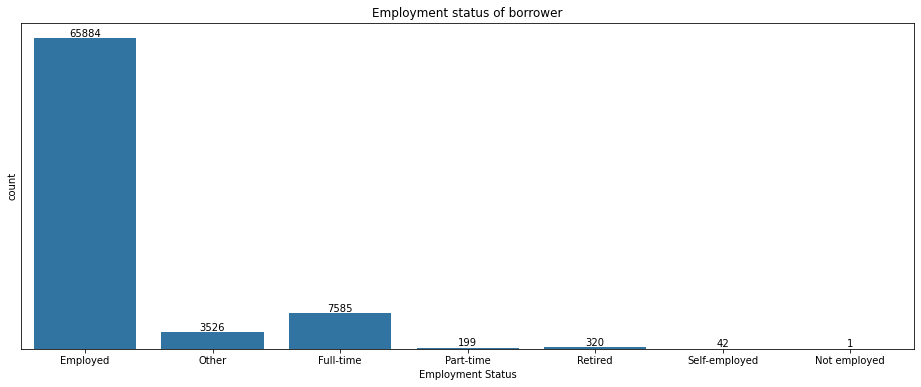

In [32]:
# Create a figure to plot the Emlpoyment Status of borrowers
plt.figure(figsize=(16,6))

# Plot a count plot of Employment Status
sbcountplot(df,'EmploymentStatus',None)

# Label and titel for a plot
plt.yticks([]);
plt.xlabel('Employment Status')
plt.title('Employment status of borrower');

##### Observations:
Most of the borrowers are Employed. More than 80% i.e 65884 number of borrower and employed and then remaining are full time and other. It means that if the borrower is employed then there are more chances of getting loan. 

### Visualization 10

##### Question: What is distribution of Debt to income ratio?

##### Visualization

Text(0.5, 1.0, 'Count plot for Debt to Income Ratio')

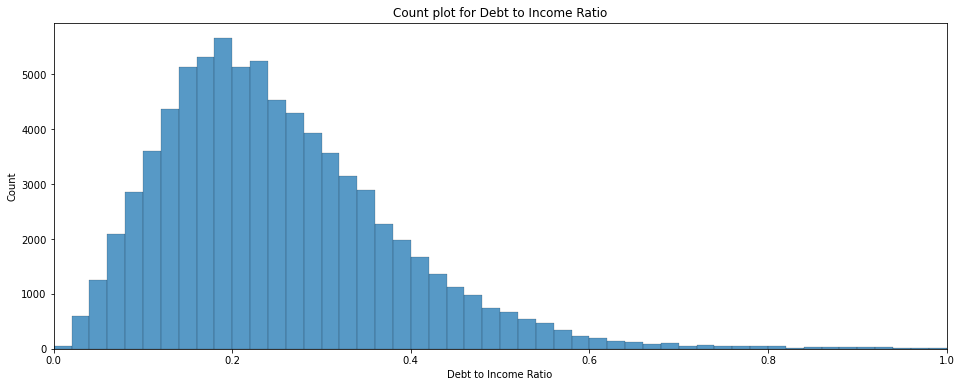

In [33]:
# Create a figure to plot histogram for Debt To Income Ratio
plt.figure(figsize=(16,6))

# Define bin size for histogram
bin_x=np.arange(0,df['DebtToIncomeRatio'].max()+1,0.02)

# Plot histogram of Debt to Income ratio
sb.histplot(data=df, x='DebtToIncomeRatio',bins=bin_x)

# Limit x axis to 1 to avoid outiliers
plt.xlim(0,1);

# Label and title for a plot
plt.xlabel('Debt to Income Ratio')
plt.title('Count plot for Debt to Income Ratio')



##### Observations:
The distribution of DebtToIncomeRatio is right skewed normal distribution and the mean value is at around 0.2. The distribution is spread from 0 to 1. 

### Visualization 11

##### Question: Which state has maximum borrowers? 

In [34]:
# Calculate count of borrowers according to the state
df['BorrowerState'].value_counts()

CA    9746
NY    5285
TX    5168
FL    4830
IL    3929
OH    3118
GA    3057
VA    2569
NJ    2506
PA    2459
MI    2415
NC    2233
MD    2089
WA    1953
MA    1709
MO    1625
MN    1567
CO    1558
IN    1536
TN    1417
WI    1386
CT    1383
AZ    1267
AL    1109
OR    1072
NV     946
SC     890
KY     819
KS     790
LA     780
AR     704
OK     677
MS     618
NE     506
UT     454
NH     415
RI     382
ID     358
DC     313
HI     309
NM     296
WV     283
DE     255
MT     194
SD     166
VT     157
AK     150
WY     109
Name: BorrowerState, dtype: int64

##### Visualization

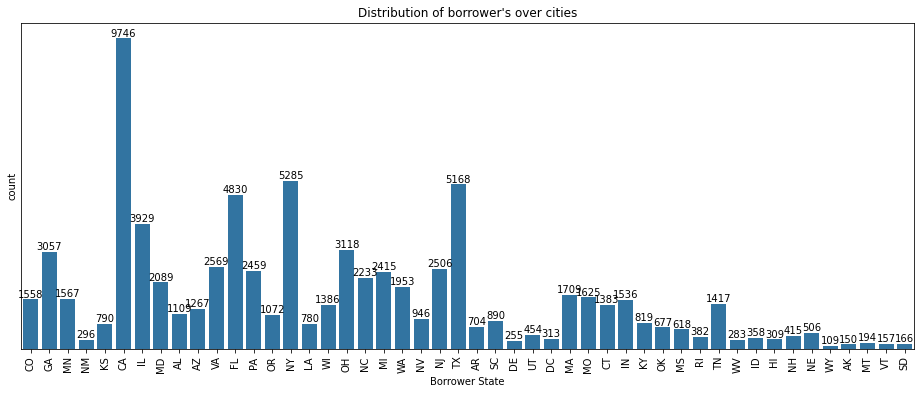

In [35]:
# Create a figure to plot count plot for borrower state
plt.figure(figsize=(16,6))

#Plot a count plot for borrower state
sbcountplot(df,'BorrowerState',None)

# Lable and title for a plot
plt.xlabel('Borrower State')
plt.title('Distribution of borrower\'s over cities')
plt.xticks(rotation=90);
plt.yticks([]);

##### Observations:
California has the highest number of borrowers, with over 9746 loan as prosper company is based in California. Borrowers from New York, Texas, Florida have also contributed more than 4500 borrowers.  


### Visualization 12

##### Question: What is income range of borrowers?

##### Visualization

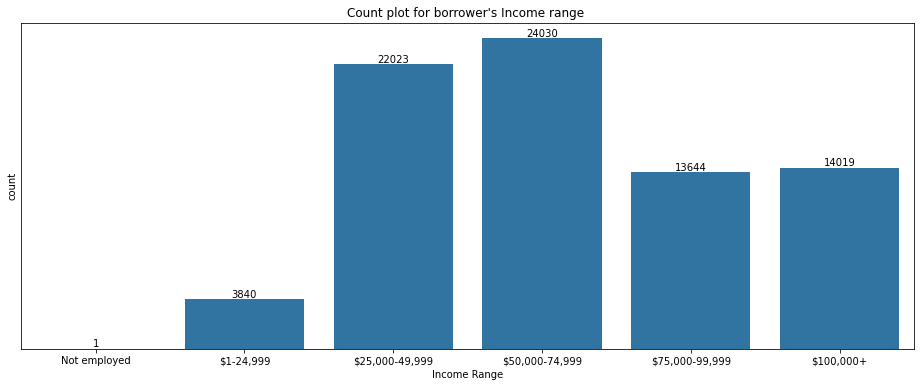

In [36]:
# Create a figure to plot Income range of the borrowers
plt.figure(figsize=(16,6))

# Create a list for Income range 
Income_range=['Not employed','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']

# Plot a count plot for Income Range
sbcountplot(df,'IncomeRange',Income_range)

# Label and title for a plot
plt.xlabel('Income Range')
plt.title('Count plot for borrower\'s Income range ')
plt.yticks([]);

##### Observations: 
The income range of most of the people is from 25,000 - 75000. Around 50000 borrowers are having income range from 25k to 75k. Very few borrowers are having income range less than 25k. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The most of the borrowers are from California state. The Borrower APR distribution is multi nodal with mean value around 2.5. Maximum borrowers have taken loan for repayment of other loans. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> 1. Not seen any unusual distribution. 
> 2. Performed data cleaning by removing rows having null values in various columns and also replacing null values of Occupation and LoanStatus columns of the data.
> 3. Changed datatype of Date columns from object to datatime.
> 4. It is necessary to either fill null value or remove it to plot the distribution of data.
> 5. The date datatype has to be changed to extract year, month and day from date.

## Bivariate Exploration

### Visualization 1

##### Question: Is there any relationship between the borrower APR and the loan term

##### Visualization

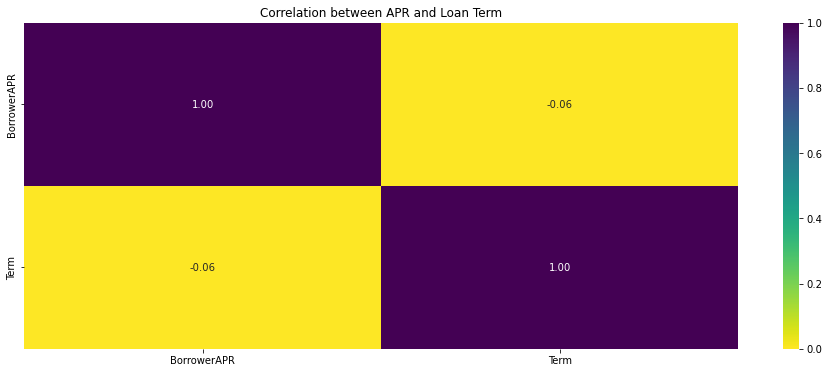

In [37]:
# Create a figure to plot correlation heatmap
plt.figure(figsize=(16,6))

# plot a Heatmap showing correlation between Borrower APR and Term
sb.heatmap(df[['BorrowerAPR','Term']].corr(), cmap = 'viridis_r', annot = True, fmt = '.2f', vmin = 0);

# Title for a plot
plt.title('Correlation between APR and Loan Term');

##### Observations:
The heatmap shows that there is negative correlation between the borrower's annual percentage rate and the loan term whether the loan is for 12,36 or 60 months. It indicates that the APR does not depends on the loan period. 

### Visualization 2

##### Question:  What is relation between the Employment Status and Stated Monthly Salary of borrower? 

##### Visualization:

Text(0.5, 1.0, 'Box plot of Monthly Income and Employment Status')

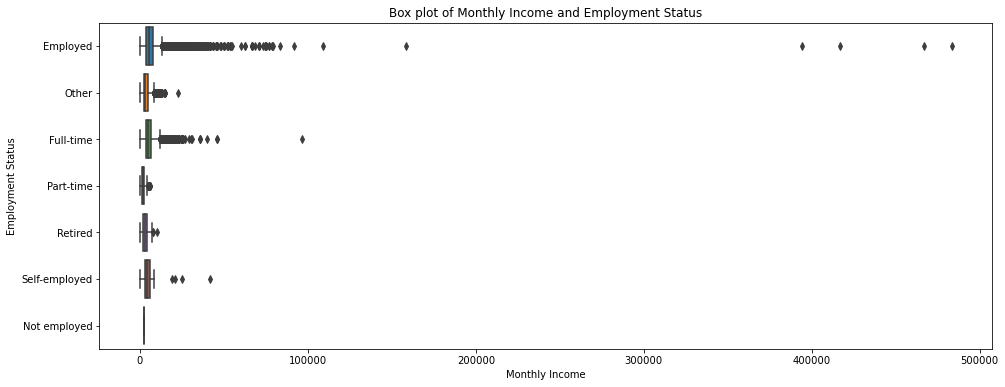

In [38]:
# Creat a figure to  plot a boxplot 
plt.figure(figsize=(16,6))

# Plot a box plot 
sb.boxplot(data=df,y='EmploymentStatus',x='StatedMonthlyIncome')

# Label and title for a plot
plt.xlabel('Monthly Income')
plt.ylabel('Employment Status')
plt.title('Box plot of Monthly Income and Employment Status')

##### Observations:
The boxplot of Employment status and Monthly salary contains outliers in the columns Employed, Full Time and self Employed. Some of the Employed borrower has very high monthly salary whereas most of the them are having salary within 100000. 

### Visualization 3

##### Question: What is relation between Stated Monthly Income and Loan amount

##### Visualization 

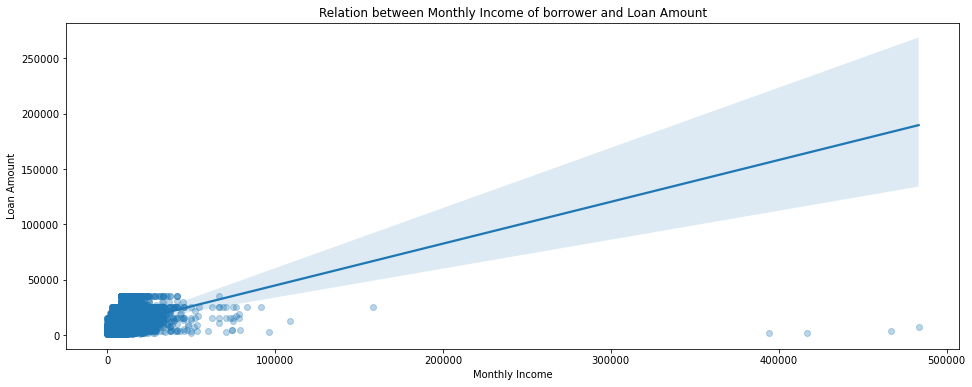

In [39]:
# Create a figure to plot a reg plot
plt.figure(figsize=(16,6))

# Plot a reg plot
sb.regplot(data=df, x='StatedMonthlyIncome', y='LoanOriginalAmount',x_jitter=25, scatter_kws={'alpha': 0.3})

# Label and title for a plot
plt.xlabel('Monthly Income')
plt.ylabel('Loan Amount')
plt.title('Relation between Monthly Income of borrower and Loan Amount');

##### Observations:
The scatter plot shows that Loan amount is directly proportional to the monthly income. High salaries borrowers can get more loan amount as compared the low salaried borrower. 

### Visualization 4

##### Question: For which term maximum loans were given? 

##### Visualization 

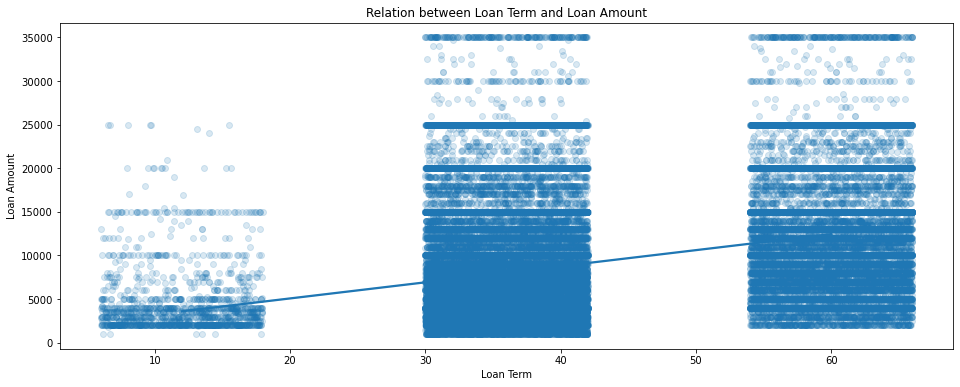

In [40]:
# Create a figure for regplot
plt.figure(figsize=(16,6))

# Plot a regplot
sb.regplot(data=df, x='Term',y='LoanOriginalAmount',x_jitter=6,scatter_kws={'alpha':1/6})

# Label and title for a plot
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.title('Relation between Loan Term and Loan Amount');

##### Observations:
The scatter plot shows the relation between Loan term/ period and loan amount. It shows that the maximum loans has been taken for period of 36 months and then for 60 months. Also the loan amount increases with the term. 

### Visualization 5

##### Question: Relation between Bank card utilization and employment status. 

##### Visualization 

C:\Users\SohamGaikwad\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 1152x432 with 0 Axes>

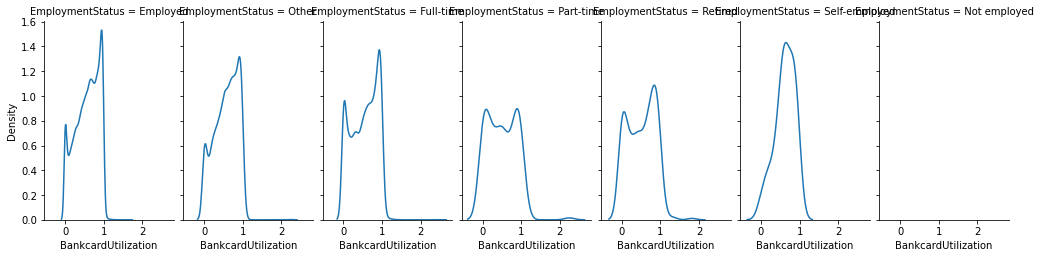

In [41]:
# Create a figure to plot facet grid
plt.figure(figsize=(16,6))

# Plot a facet grid between Emplyment Status and Bank Card Utilization
g=sb.FacetGrid(data=df, col='EmploymentStatus')
g.map(sb.kdeplot,'BankcardUtilization')

# Adjust the grid plots
g.fig.set_size_inches(14, 4)


##### Observations:
The facet grid shows that the density of bank card utilization is more for employed, self employed and full time borrowers. 

### Visualization 6

##### Question: What is the range income of the borrower having maximum prosper score

##### Visualization

Text(0.5, 1.0, 'Relation between the Prosper Score and Income Range')

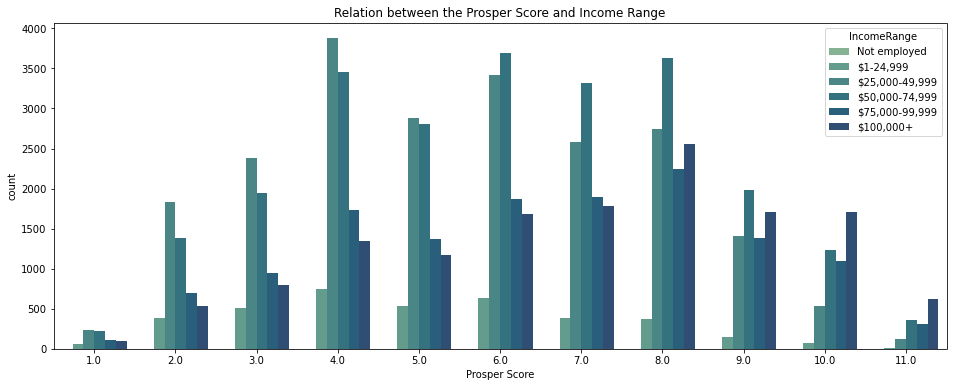

In [42]:
# Create a figure to plot countplot
plt.figure(figsize=(16,6))

# Plot a countplot showing prosper score and income range of the borrower
sb.countplot(data=df,x='ProsperScore',hue='IncomeRange',hue_order=Income_range,palette='crest')

# Label and title for a plot
plt.xlabel('Prosper Score') 
plt.title('Relation between the Prosper Score and Income Range') 

##### Observations:
The highest prosper score observed is 4 and the income range for the same is from 1-25k. It is also observed that the most of  borrowers also have prosper score 6 and 8 with income range of 25-50k. Less prosper score is observed for an income range of 100K+. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. Loan amount is directly proportional to the monthly income
> 2. There is positive relationship between borrower rate and lender yield. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It has observed that most of the loan have been taken for term of 36 months. 

## Multivariate Exploration


### Visualization 1

##### Question: Correlation between 'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn'

##### Visualization

<Figure size 1152x432 with 0 Axes>

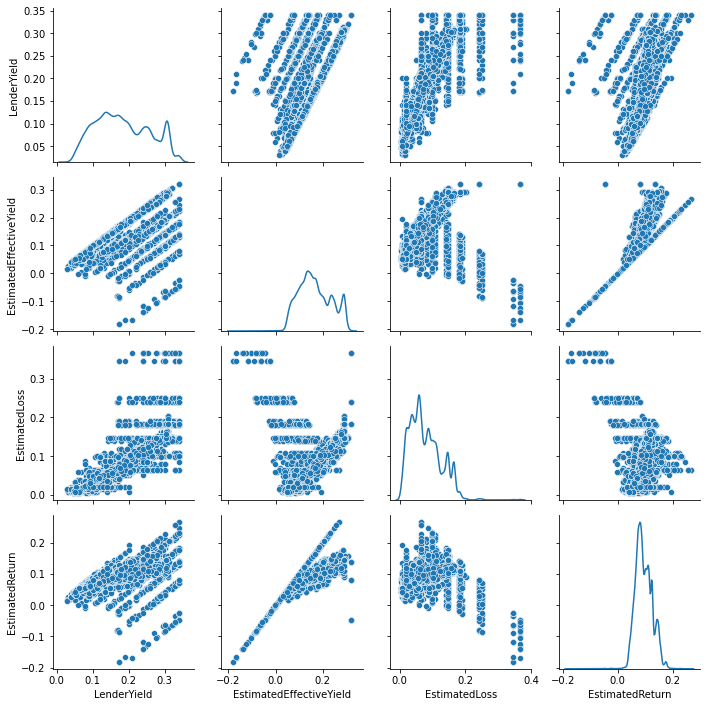

In [49]:
# Create a figure for a matrix plot
plt.figure(figsize=[16, 6])

# Plot Matrix: Stats
yield_stats = ['LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn']

# Plot pair grid for yield stats
g = sb.PairGrid(data = df, vars = yield_stats);

# Plot a kde plot for the diagonal 
g.map_diag(sb.kdeplot);

# Plot scatter plot for upper and lower part of the plot
g.map_offdiag(sb.scatterplot);

##### Observations:
1. There is a positive relationship between lender yield and all other parameters.
2. Negative relationship has been observed between Estimated effective yield and estimated loss also in between Estimated return and estimated loss.  

### Visualization 2

##### Question: Which term has maximum number of charged off loans?

In [44]:
# Make a group of loans according to the term 
Termwise_completion=df.groupby('Term')['LoanStatus'].value_counts()

# Create a table of count values
Termwise_completion=Termwise_completion.reset_index(name='Count')
Termwise_completion

,Term,LoanStatus,Count
0,12,Completed,1290
1,12,Chargedoff,53
2,12,Current,52
3,12,FinalPaymentInProgress,8
4,12,Defaulted,5
5,12,Past Due (1-15 days),2
6,12,Past Due (16-30 days),2
7,12,Past Due (31-60 days),1
8,12,Past Due (91-120 days),1
9,36,Current,33282


##### Visualization

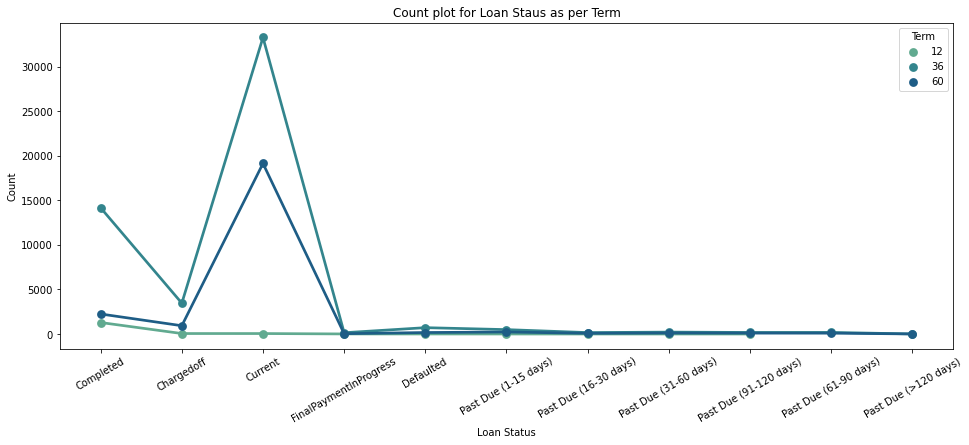

In [45]:
# Create a figure for pointplot
plt.figure(figsize=(16,6))

# Plot a pointplot of a loan status 
sb.pointplot(data=Termwise_completion, x='LoanStatus',y='Count',hue='Term', palette='crest')

# Label and title for a plot
plt.xlabel('Loan Status')
plt.title('Count plot for Loan Staus as per Term')
plt.xticks(rotation=30);

##### Observations:
In case of completed status of loan, maximum loans completed of term of 36 months. Also it has maximum number of charged off and current loans. In other cases there is no much difference can be observed for all three terms. 

The number of charged off loans in case of 36 months term is 3462 where as in 60 months term it is 930 and in 12 months term is 53.

### Visualization 2

##### Question: Correlation between 'LoanOriginalAmount','ProsperScore','Term','EmploymentStatusDuration','OpenCreditLines'

##### Visualization

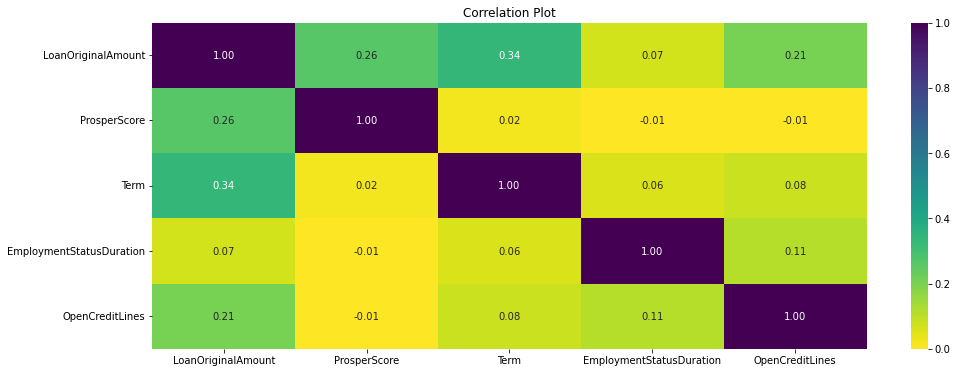

In [46]:
# Create a figure to plot correlation heatmap
plt.figure(figsize=(16,6))

# Create a list of correlation parameters
param=['LoanOriginalAmount','ProsperScore','Term','EmploymentStatusDuration','OpenCreditLines']

# plot a Heatmap to show the correlation between given parameters
sb.heatmap(df[param].corr(), cmap = 'viridis_r', annot = True, fmt = '.2f', vmin = 0);

# Title for a plot
plt.title('Correlation Plot');

##### Observations:
1. There is moderate positive relationship between Loan amount and prosper score which indicates that for good prosper score there is a possibility of getting loan.
2. Positive relationship between loan amount and term indicates that for large amount of loan long term is required to repay it. 
3. Relationship between loan amount and open credit lines shows that for larges loan amount there are more open credit will be given. 

### Visualization 3

##### Question: How is the variation of loan amount with respect to the term and the year?

##### Visualization

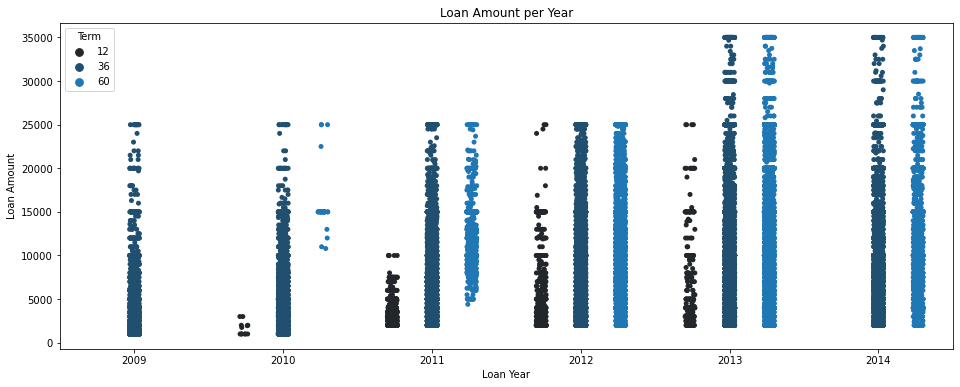

In [47]:
# Create a figure to plot strip plot
plt.figure(figsize=(16,6))

# Create a column having loan year
df['LoanYear']=df['LoanOriginationDate'].dt.year

# Plot a strip plot 
sb.stripplot(data=df, x='LoanYear', y='LoanOriginalAmount', hue='Term', color=sb.color_palette()[0],dodge = 0.5)

# Label and title for a plot
plt.xlabel('Loan Year')
plt.ylabel('Loan Amount')
plt.title('Loan Amount per Year');

##### Observations:
It shows that the term of 36 and 60 month has the maximum amount of loan. There is gradual increase in the loan amount every year. The loan amount is increased above 25k from year 2013. Also there are no loans taken for 12 months in year 2014. 

### Visualization 4

##### Question: Correlation between 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees','LP_ServiceFees'

##### Visualization 

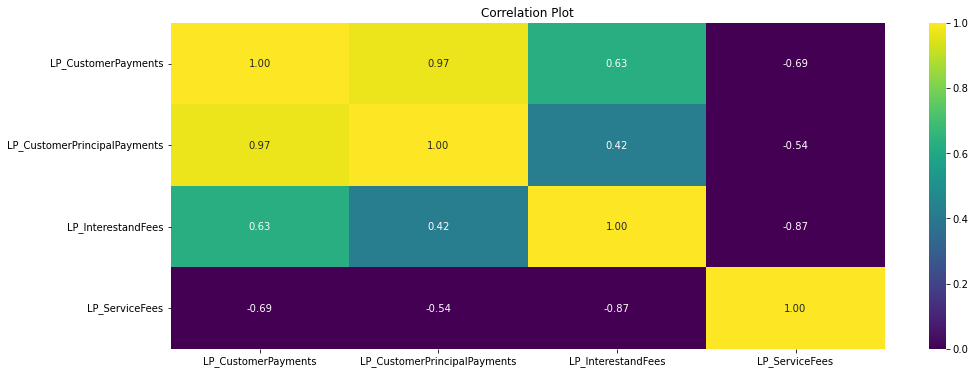

In [48]:
# Create a figure to plot correlation heatmap
plt.figure(figsize=(16,6))

# Creat a list of correlation parameters
LP_stats=['LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees','LP_ServiceFees']

# Plot a heatmap to show the correlation between LP_stats
sb.heatmap(df[LP_stats].corr(),cmap = 'viridis', annot = True, fmt = '.2f', vmin = 0)

# Title for a plt 
plt.title('Correlation Plot');

##### Observations: 
There is positive relationship between LP Customers principal payments and interestandfees. It means that as customers principal payments increases it also increase interest and fees too. LP service fees has negative corelation with all other parameters.   

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. There is moderate positive relationship between Loan amount and prosper score which indicates that for good prosper score there is a possibility of getting loan.
> 2. There is positive relationship between LP Customers principal payments and interestandfees. It means that as customers principal payments increases it also increase interest and fees too.

### Were there any interesting or surprising interactions between features?

> Even if most of the loans have been taken for the period of 36 months it has been observed that the loan amount of 60 months was maximum. It indicates that the large amount payment needs more time for repayment. 

## Conclusions
The main aim of data exploration of Prosper Loan Data is to identify borrowers requirement, motive of loan and eligibility to get the loan. Various parameters have been explored to get this information and following are the details of the same.

> 1. Borrower's APR does not depends on the term of loan also irrespective of period the APR remain same for any loan amount.
> 2. Most of the People have taken loan for debt consolidation that is repayment of other loans not for any purchase of house or to start new business. Also people have taken loan for wedding ceremony, baby and adoption, engagement ceremony. 
> 3. The eligibility to get the loan can be decided from the employment status, Income range and monthly salary of borrower.
    > The most number of borrowers are employed and full time.
    > The income range of most of the people is from 25,000 - 75000.
> 4. Prosper score and loan amount has positive correlation and prosper score influenced positively by low debt to income ratio and current means of employment.  
> 5. Most of the people have taken loan in the range 4.9k to 5k. Decrease in APR can encourage borrower to take large amount of loan and also for long term. 